In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
from datetime import date,datetime


In [78]:
#Useful Functions For Bird People
def Max_Value(data,column=str):
    max_value_item = data[column].value_counts().idxmax()
    max_value_quantity = data[column].value_counts().max()
    if isinstance(max_value_item, datetime):
        max_value_item = max_value_item.date()

    return max_value_item,max_value_quantity

def Min_Value(data,column=str):
    min_value_item = data[column].value_counts().idxmin()
    min_value_quantity = data[column].value_counts().min()
    if isinstance(min_value_item, datetime):
        max_value_item = min_value_item.date()
        
    return min_value_item,min_value_quantity

def Date_Fixer(data):
    data['Date'] = data['Date_time'].dt.strftime("%m-%d")
    data['Month'] = pd.to_datetime(data['Date_time']).dt.strftime('%B')
    data = data[['Month','Date','Bird Species','Location','Date_time']]
    
    return data

def Data_Sorter(data):
    data = data[['Month','Date','Bird Species','Location','Date_time']]
    return data


In [ ]:
#importing data and making it a dataframe

# You can skip this.

df_new = pd.read_csv("PFW_all_2021_2024_May2024_Public.csv")
df_new
list(df_new['Month'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(11),
 np.int64(12),
 np.int64(10)]

In [97]:
#Filtering list down to only contain OHIO bird spots

#filtered_df = df_new[df_new['SUBNATIONAL1_CODE'] == 'US-OH']
#filtered_df.to_csv('Ohio_Only_Birders_DF.csv')
filtered_df = pd.read_csv('Ohio_Only_Birders_DF.csv')
filtered_df

,Unnamed: 0,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,ENTRY_TECHNIQUE,SUB_ID,OBS_ID,Month,Day,...,PLUS_CODE,VALID,REVIEWED,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,EFFORT_HRS_ATLEAST,SNOW_DEP_ATLEAST,Data_Entry_Method
0,1857,L10007061,41.111452,-81.964967,US-OH,/GOOGLE_MAP/ZOOM:15,S100461697,OBS1314976999,1,7,...,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1.001,0.0,PFW Web 4.1.5
1,1858,L10007061,41.111452,-81.964967,US-OH,/GOOGLE_MAP/ZOOM:15,S100461697,OBS1314977000,1,7,...,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1.001,0.0,PFW Web 4.1.5
2,1859,L10007061,41.111452,-81.964967,US-OH,/GOOGLE_MAP/ZOOM:15,S100461697,OBS1314977001,1,7,...,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1.001,0.0,PFW Web 4.1.5
3,1860,L10007061,41.111452,-81.964967,US-OH,/GOOGLE_MAP/ZOOM:15,S100461697,OBS1314977002,1,7,...,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1.001,0.0,PFW Web 4.1.5
4,1861,L10007061,41.111452,-81.964967,US-OH,/GOOGLE_MAP/ZOOM:15,S100461697,OBS1314977003,1,7,...,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1.001,0.0,PFW Web 4.1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437417,11056911,L99248,39.079719,-84.406433,US-OH,PointMaker1.0_2,S99637498,OBS1305291866,12,26,...,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.001,0.0,PFW Mobile App v1.1.17
437418,11056912,L99248,39.079719,-84.406433,US-OH,PointMaker1.0_2,S99637498,OBS1305319320,12,26,...,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.001,0.0,PFW Mobile App v1.1.17
437419,11056913,L99248,39.079719,-84.406433,US-OH,PointMaker1.0_2,S99637498,OBS1305291868,12,26,...,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.001,0.0,PFW Mobile App v1.1.17
437420,11056914,L99248,39.079719,-84.406433,US-OH,PointMaker1.0_2,S99637498,OBS1305319321,12,26,...,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.001,0.0,PFW Mobile App v1.1.17


In [5]:
#Making a list of columns in the data set to aid in further filtering.
column_list = filtered_df.keys().tolist()
column_list

['LOC_ID',
 'LATITUDE',
 'LONGITUDE',
 'SUBNATIONAL1_CODE',
 'ENTRY_TECHNIQUE',
 'SUB_ID',
 'OBS_ID',
 'Month',
 'Day',
 'Year',
 'PROJ_PERIOD_ID',
 'SPECIES_CODE',
 'alt_full_spp_code',
 'HOW_MANY',
 'PLUS_CODE',
 'VALID',
 'REVIEWED',
 'DAY1_AM',
 'DAY1_PM',
 'DAY2_AM',
 'DAY2_PM',
 'EFFORT_HRS_ATLEAST',
 'SNOW_DEP_ATLEAST',
 'Data_Entry_Method']

In [98]:
filtered_df = filtered_df[['LOC_ID','LATITUDE','LONGITUDE','Month','Day','Year','SPECIES_CODE','VALID','REVIEWED']]

filtered_df

,LOC_ID,LATITUDE,LONGITUDE,Month,Day,Year,SPECIES_CODE,VALID,REVIEWED
0,L10007061,41.111452,-81.964967,1,7,2022,eursta,1.0,0.0
1,L10007061,41.111452,-81.964967,1,7,2022,dowwoo,1.0,0.0
2,L10007061,41.111452,-81.964967,1,7,2022,bkcchi,1.0,0.0
3,L10007061,41.111452,-81.964967,1,7,2022,norcar,1.0,0.0
4,L10007061,41.111452,-81.964967,1,7,2022,blujay,1.0,0.0
...,...,...,...,...,...,...,...,...,...
437417,L99248,39.079719,-84.406433,12,26,2021,moudov,1.0,0.0
437418,L99248,39.079719,-84.406433,12,26,2021,daejun,1.0,0.0
437419,L99248,39.079719,-84.406433,12,26,2021,carchi,1.0,0.0
437420,L99248,39.079719,-84.406433,12,26,2021,tuftit,1.0,0.0


In [99]:
#Checking valid data via the websites guidelines, https://feederwatch.org/explore/raw-dataset-requests/, data appears to be only valid when VALID = 1.0 and REVIEWED = 1.0 or 0.0.  I removed all other data
#to match that format.
valid_df = filtered_df[filtered_df['VALID'] == 1.0]
valid_df

,LOC_ID,LATITUDE,LONGITUDE,Month,Day,Year,SPECIES_CODE,VALID,REVIEWED
0,L10007061,41.111452,-81.964967,1,7,2022,eursta,1.0,0.0
1,L10007061,41.111452,-81.964967,1,7,2022,dowwoo,1.0,0.0
2,L10007061,41.111452,-81.964967,1,7,2022,bkcchi,1.0,0.0
3,L10007061,41.111452,-81.964967,1,7,2022,norcar,1.0,0.0
4,L10007061,41.111452,-81.964967,1,7,2022,blujay,1.0,0.0
...,...,...,...,...,...,...,...,...,...
437417,L99248,39.079719,-84.406433,12,26,2021,moudov,1.0,0.0
437418,L99248,39.079719,-84.406433,12,26,2021,daejun,1.0,0.0
437419,L99248,39.079719,-84.406433,12,26,2021,carchi,1.0,0.0
437420,L99248,39.079719,-84.406433,12,26,2021,tuftit,1.0,0.0


In [100]:
#Time to start doing some cleaning, we're starting with birds here, they currently have a species code and we'll need a list of those to convert them into their actual bird names. 
#First removing the last two columns 'VALID' and 'REVIEWED' since they are no longer needed. 
valid_df = valid_df[['LOC_ID','LATITUDE','LONGITUDE','Month','Day','Year','SPECIES_CODE']]
bird_list = valid_df['SPECIES_CODE'].unique().tolist()
#This list is the list of UNIQUE birds that we have currently in our dataframe (valid_df), we will have to convert all of these to a
bird_list      



['eursta',
 'dowwoo',
 'bkcchi',
 'norcar',
 'blujay',
 'slcjun',
 'houspa',
 'amtspa',
 'haiwoo',
 'houfin',
 'carwre',
 'tuftit',
 'whbnut',
 'amegfi',
 'sonspa',
 'amerob',
 'moudov',
 'rewbla',
 'bnhcow',
 'chispa',
 'daejun',
 'rebwoo',
 'reshaw',
 'comgra',
 'norfli',
 'easblu',
 'y00033',
 'rebnut',
 'carchi',
 'turvul',
 'whtspa',
 'amecro',
 'normoc',
 'shshaw',
 'coohaw',
 'eastow',
 'swaspa',
 'mallar3',
 'whcspa',
 'purfin',
 'pinsis',
 'rthhum',
 'rocpig1',
 'cangoo',
 'grycat',
 'robgro',
 'brnthr',
 'rehwoo',
 'comred',
 'rethaw',
 'yerwar',
 'fiespa',
 'brncre',
 'foxspa',
 'cedwax',
 'yebsap',
 'gockin',
 'pilwoo',
 'balori',
 'houwre',
 'myrwar',
 'herthr',
 'norhar2',
 'grhowl',
 'wooduc',
 'wiltur',
 'grbher3',
 'easpho',
 'accipi',
 'x00004',
 'ruckin',
 'evegro',
 'baleag',
 'belkin1',
 'easowl1',
 'grbher',
 'treswa',
 'rinphe1',
 'norcar1',
 'buggna',
 'brdowl',
 'mutswa',
 'amekes',
 'buffle',
 'barswa',
 'whwcro',
 'indbun',
 'killde',
 'rewbla1',
 'norbob',
 

In [101]:
#importing the Species Code translator
species_code_df = pd.read_csv('PFW_spp_translation_table_May2024.csv')
filtered_SC_df = species_code_df[['species_code','american_english_name']]
print(filtered_SC_df)

translate_dict = filtered_SC_df.set_index('species_code')['american_english_name'].to_dict()
translate_dict



     species_code                american_english_name
0         grerhe1                         Greater Rhea
1         gretin1                        Great Tinamou
2         wfwduc1           White-faced Whistling-Duck
3          bbwduc         Black-bellied Whistling-Duck
4          fuwduc               Fulvous Whistling-Duck
...           ...                                  ...
1087      whcsee2            Cinnamon-rumped Seedeater
1088       whcsee  Morelet's/Cinnamon-rumped Seedeater
1089      grasal2            Cinnamon-bellied Saltator
1090      passer1                        passerine sp.
1091        bird1                             bird sp.

[1092 rows x 2 columns]


{'grerhe1': 'Greater Rhea',
 'gretin1': 'Great Tinamou',
 'wfwduc1': 'White-faced Whistling-Duck',
 'bbwduc': 'Black-bellied Whistling-Duck',
 'fuwduc': 'Fulvous Whistling-Duck',
 'snogoo': 'Snow Goose',
 'rosgoo': "Ross's Goose",
 'swagoo2': 'Swan Goose (Domestic type)',
 'gwfgoo': 'Greater White-fronted Goose',
 'gwfgoo2': 'Greater White-fronted Goose (Western)',
 'domgoo1': 'Domestic goose sp. (Domestic type)',
 'brant': 'Brant',
 'bargoo': 'Barnacle Goose',
 'cacgoo1': 'Cackling Goose',
 'alcgoo1': 'Cackling Goose (Aleutian)',
 'ricgoo1': "Cackling Goose (Richardson's)",
 'cacgoo2': 'Cackling Goose (minima)',
 'cangoo': 'Canada Goose',
 'cangoo4': 'Canada Goose (moffitti/maxima)',
 'cangoo1': 'Canada Goose (canadensis Group)',
 'x00415': 'Greater White-fronted x Canada Goose (hybrid)',
 'x00759': 'Domestic goose sp. x Canada Goose (hybrid)',
 'x00197': 'Snow x Canada Goose (hybrid)',
 'hawgoo': 'Hawaiian Goose',
 'mutswa': 'Mute Swan',
 'truswa': 'Trumpeter Swan',
 'tunswa': 'Tundr

In [102]:
#replacing the SPECIES_CODE with the english bird name.
translate_dict = filtered_SC_df.set_index('species_code')['american_english_name'].to_dict()
translate_dict

valid_df['SPECIES_CODE'] = valid_df['SPECIES_CODE'].map(translate_dict)
valid_df


C:\Users\Awdam\AppData\Local\Temp\ipykernel_18900\1294113910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['SPECIES_CODE'] = valid_df['SPECIES_CODE'].map(translate_dict)


,LOC_ID,LATITUDE,LONGITUDE,Month,Day,Year,SPECIES_CODE
0,L10007061,41.111452,-81.964967,1,7,2022,European Starling
1,L10007061,41.111452,-81.964967,1,7,2022,Downy Woodpecker
2,L10007061,41.111452,-81.964967,1,7,2022,Black-capped Chickadee
3,L10007061,41.111452,-81.964967,1,7,2022,Northern Cardinal
4,L10007061,41.111452,-81.964967,1,7,2022,Blue Jay
...,...,...,...,...,...,...,...
437417,L99248,39.079719,-84.406433,12,26,2021,Mourning Dove
437418,L99248,39.079719,-84.406433,12,26,2021,Dark-eyed Junco
437419,L99248,39.079719,-84.406433,12,26,2021,Carolina Chickadee
437420,L99248,39.079719,-84.406433,12,26,2021,Tufted Titmouse


In [11]:
# DO NOT RUN this unless you need to reapply the locations to the coordinates, this will run for ~10 minutes before applying locations.
# for convenience I've written the df to a CSV


#df_coordinates = valid_df[['LATITUDE','LONGITUDE']].drop_duplicates()
#print(df_coordinates)

#geolocator = Nominatim(user_agent="geoapi")

# def coordinate_finder(lat,lon):
#     try:
#         location = geolocator.reverse((lat,lon), timeout = 10)
#         return location.address if location else "UNKNOWN"
#     except GeocoderTimedOut:
#         return "Timeout Error"
#     sleep(1)

# df_coordinates['location'] = df_coordinates.apply(
#     lambda row: coordinate_finder(row['LATITUDE'],row['LONGITUDE']), axis=1
# )

# df_coordinates = df_coordinates.merge(df_coordinates,on=['LATITUDE','LONGITUDE'], how='left')

# df_coordinates_final = df_coordinates[['LATITUDE','LONGITUDE','location_x']]
#df_coordinates_final.to_csv('coords_location_df.csv', sep=',',encoding='utf-8',index=False,header=True)




In [103]:
## IF YOU SKIPPED THE COORDINATE FINDER METHOD, YOU START HERE.
df_coordinates_final = pd.read_csv("coords_location_df.csv")
df_coordinates_final

,LATITUDE,LONGITUDE,location_x
0,41.111452,-81.964967,"7654, Spencer Lake Road, Lafayette Township, C..."
1,41.366817,-83.659746,"58, Valleyview Drive, Bowling Green, Wood Coun..."
2,39.085438,-84.284852,"Ivy Pointe Senior Apartments, Clough Pike, Hil..."
3,40.080776,-83.026138,"279, Frontenac Place, Riverlea, Sharon Townshi..."
4,41.720257,-83.599564,"5714, Winona Drive, Ferndale, Toledo, Lucas Co..."
...,...,...,...
1206,41.061767,-80.801804,"4086, Thats Life Lane, Summer Wind, Mahoning C..."
1207,41.493492,-81.573289,"2974, Scarborough Road, Euclid Golf Historic D..."
1208,41.450140,-81.923480,"Westlake Post Office, 27300, Center Ridge Road..."
1209,41.472413,-81.865397,"1283, Bates Road, Rocky River, Cuyahoga County..."


In [104]:
merged_loc_df = pd.merge(valid_df,df_coordinates_final,on=['LATITUDE','LONGITUDE'],how='left')
butler_county_df = merged_loc_df[merged_loc_df['location_x'].str.contains('Butler County')]
final_df = butler_county_df.rename(columns={'SPECIES_CODE': 'Bird Species','location_x' : 'Location'})
final_df['Date_time'] = pd.to_datetime(final_df[['Month','Day','Year']])

#df_YEAR would be from 11-202x to 4-202y
df_2021 = final_df[(final_df['Date_time'] >= '2020-11-01') & (final_df['Date_time'] <= '2021-04-30')]
df_2022 = final_df[(final_df['Date_time'] >= '2021-11-01') & (final_df['Date_time'] <= '2022-04-30')]
df_2023 = final_df[(final_df['Date_time'] >= '2022-11-01') & (final_df['Date_time'] <= '2023-04-30')]
df_2024 = final_df[(final_df['Date_time'] >= '2023-11-01') & (final_df['Date_time'] <= '2024-04-30')]

df_2021 = Data_Sorter(Date_Fixer(df_2021))
df_2022 = Data_Sorter(Date_Fixer(df_2022))
df_2023 = Data_Sorter(Date_Fixer(df_2023))
df_2024 = Data_Sorter(Date_Fixer(df_2024))

df_2021.columns




C:\Users\Awdam\AppData\Local\Temp\ipykernel_18900\1274612072.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date_time'].dt.strftime("%m-%d")
C:\Users\Awdam\AppData\Local\Temp\ipykernel_18900\1274612072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Date_time']).dt.strftime('%B')
C:\Users\Awdam\AppData\Local\Temp\ipykernel_18900\1274612072.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Index(['Month', 'Date', 'Bird Species', 'Location', 'Date_time'], dtype='object')

In [55]:
#2024 Stats
print(df_2024.shape)
print('In 2024, we saw a variety of birds, ' + str(len(list(df_2024['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2024,top_bird_count_2024 = Max_Value(df_2024,'Bird Species')
print(f'The most common bird is the {top_bird_df_2024} with {top_bird_count_2024} sightings!')

#Rare Bird
rare_bird_df_2024,rare_bird_count_2024 = Min_Value(df_2024,'Bird Species')
print(f'The least seen bird is the {rare_bird_df_2024} with {rare_bird_count_2024} sightings!')

#Busiest Location
busiest_location_df_2024,location_visits_df_2024 = Max_Value(df_2024,'Location')
print(f'The busiest location is {busiest_location_df_2024} with {location_visits_df_2024} visits!')

#Busiest Day
busiest_day_df_2024, day_visits_df_2024 = Max_Value(df_2024,'Date')
print(f'The busiest day is {busiest_day_df_2024} with {day_visits_df_2024} visits!')




(4319, 4)
In 2024, we saw a variety of birds, 61 varieties to be exact!
The most common bird is the House Finch with 229 sightings!
The least seen bird is the Evening Grosbeak with 1 sightings!
The busiest location is Oxford Millville Road, Oxford, Hanover Township, Butler County, Ohio, 45056, United States with 609 visits!
The busiest day is 02-03 with 131 visits!


In [56]:
#2023 Stats
print(df_2023.shape)
print('In 2023, we saw a variety of birds, ' + str(len(list(df_2023['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2023,top_bird_count_2023 = Max_Value(df_2023,'Bird Species')
print(f'The most common bird is the {top_bird_df_2023} with {top_bird_count_2023} sightings!')

#Rare Bird
rare_bird_df_2023,rare_bird_count_2023 = Min_Value(df_2023,'Bird Species')
print(f'The least seen bird is the {rare_bird_df_2023} with {rare_bird_count_2023} sightings!')

#Busiest Location
busiest_location_df_2023,location_visits_df_2023 = Max_Value(df_2023,'Location')
print(f'The busiest location is {busiest_location_df_2023} with {location_visits_df_2023} visits!')

#Busiest Day
busiest_day_df_2023, day_visits_df_2023 = Max_Value(df_2023,'Date')
print(f'The busiest day is {busiest_day_df_2023} with {day_visits_df_2023} visits!')


(3460, 4)
In 2023, we saw a variety of birds, 57 varieties to be exact!
The most common bird is the Northern Cardinal with 188 sightings!
The least seen bird is the Evening Grosbeak with 1 sightings!
The busiest location is 7061, Forest View Drive, West Chester Township, Butler County, Ohio, 45069, United States with 626 visits!
The busiest day is 03-25 with 108 visits!


In [57]:
#2022 Stats

print(df_2022.shape)
print('In 2022, we saw a variety of birds, ' + str(len(list(df_2022['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2022,top_bird_count_2022 = Max_Value(df_2022,'Bird Species')
print(f'The most common bird is the {top_bird_df_2022} with {top_bird_count_2022} sightings!')

#Rare Bird
rare_bird_df_2022,rare_bird_count_2022 = Min_Value(df_2022,'Bird Species')
print(f'The least seen bird is the {rare_bird_df_2022} with {rare_bird_count_2022} sightings!')

#Busiest Location
busiest_location_df_2022,location_visits_df_2022 = Max_Value(df_2022,'Location')
print(f'The busiest location is {busiest_location_df_2022} with {location_visits_df_2022} visits!')

#Busiest Day
busiest_day_df_2022, day_visits_df_2022 = Max_Value(df_2022,'Date')
print(f'The busiest day is {busiest_day_df_2022} with {day_visits_df_2022} visits!')


(3564, 4)
In 2022, we saw a variety of birds, 59 varieties to be exact!
The most common bird is the Northern Cardinal with 214 sightings!
The least seen bird is the Yellow-bellied Sapsucker with 1 sightings!
The busiest location is 7061, Forest View Drive, West Chester Township, Butler County, Ohio, 45069, United States with 555 visits!
The busiest day is 03-12 with 96 visits!


In [58]:
#2021 Stats
print(df_2021.shape)
print('In 2021, we saw a variety of birds, ' + str(len(list(df_2021['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2021,top_bird_count_2021 = Max_Value(df_2021,'Bird Species')
print(f'The most common bird is the {top_bird_df_2021} with {top_bird_count_2021} sightings!')

#Rare Bird
rare_bird_df_2021,rare_bird_count_2021 = Min_Value(df_2021,'Bird Species')
print(f'The least seen bird is the {rare_bird_df_2021} with {rare_bird_count_2021} sightings!')

#Busiest Location
busiest_location_df_2021,location_visits_df_2021 = Max_Value(df_2021,'Location')
print(f'The busiest location is {busiest_location_df_2021} with {location_visits_df_2021} visits!')

#Busiest Day
busiest_day_df_2021, day_visits_df_2021 = Max_Value(df_2021,'Date')
print(f'The busiest day is {busiest_day_df_2021} with {day_visits_df_2021} visits!')

(3188, 4)
In 2021, we saw a variety of birds, 52 varieties to be exact!
The most common bird is the Northern Cardinal with 210 sightings!
The least seen bird is the Ruby-throated Hummingbird with 1 sightings!
The busiest location is 6963, Imhoff Road, Reily Township, Butler County, Ohio, 45056, United States with 439 visits!
The busiest day is 11-30 with 81 visits!


In [87]:
birds_of_2021 = df_2021.groupby('Bird Species').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
Locations_of_2021 = df_2021.groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
feeder_visits = df_2021.groupby('Month').size().reset_index(name='Count2021').sort_values(by='Month',ascending=False)
print(birds_of_2021.head(5))
print(Locations_of_2021.head(5))
feeder_visits

          Bird Species  Count
29   Northern Cardinal    210
25         House Finch    199
16    Downy Woodpecker    190
1   American Goldfinch    180
28       Mourning Dove    180
                                             Location  Count
7   6963, Imhoff Road, Reily Township, Butler Coun...    439
5   6336, Lesourdsville West Chester Road, Liberty...    380
3   4259, Stone Creek Drive, Greystone, Liberty To...    351
10  7741, Bonnie Drive, West Chester Township, But...    351
1   260, South Mill Street, Seven Mile, St. Clair ...    324


,Month,Count2021
5,November,387
4,March,653
3,January,613
2,February,683
1,December,555
0,April,297


In [88]:
birds_of_2022 = df_2022.groupby('Bird Species').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
Locations_of_2022 = df_2022.groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
df_2022_counts = df_2022.groupby('Month').size().reset_index(name='Count2022')
feeder_visits = pd.merge(feeder_visits,df_2022_counts, on='Month', how='outer')
print(birds_of_2022.head(5))
print(Locations_of_2022.head(5))
print(feeder_visits)

         Bird Species  Count
36  Northern Cardinal    214
21   Downy Woodpecker    202
31        House Finch    201
35      Mourning Dove    201
52    Tufted Titmouse    199
                                             Location  Count
9   7061, Forest View Drive, West Chester Township...    555
11  7741, Bonnie Drive, West Chester Township, But...    421
7   6963, Imhoff Road, Reily Township, Butler Coun...    413
6   6336, Lesourdsville West Chester Road, Liberty...    411
2   4259, Stone Creek Drive, Greystone, Liberty To...    312
      Month  Count2021  Count2022
0     April        297        671
1  December        555        533
2  February        683        602
3   January        613        738
4     March        653        669
5  November        387        351


In [94]:
birds_of_2023 = df_2023.groupby('Bird Species').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
Locations_of_2023 = df_2023.groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
df_2023_counts = df_2023.groupby('Month').size().reset_index(name='Count2023')
feeder_visits = pd.merge(feeder_visits,df_2023_counts, on='Month',how='outer')
print(birds_of_2023.head(5))
print(Locations_of_2023.head(5))

         Bird Species  Count
35  Northern Cardinal    188
50    Tufted Titmouse    187
19   Downy Woodpecker    186
29        House Finch    184
6            Blue Jay    179
                                             Location  Count
7   7061, Forest View Drive, West Chester Township...    626
10  7741, Bonnie Drive, West Chester Township, But...    487
6   6963, Imhoff Road, Reily Township, Butler Coun...    446
0   1378, Roundhill Drive, Hanover Township, Butle...    416
1   260, South Mill Street, Seven Mile, St. Clair ...    336
      Month  Count2023
0     April        543
1  December        676
2  February        537
3   January        542
4     March        645
5  November        517


In [93]:
birds_of_2024 = df_2024.groupby('Bird Species').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
Locations_of_2024 = df_2024.groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
df_2024_counts = df_2024.groupby('Month').size().reset_index(name='Count2024')
feeder_visits = pd.merge(feeder_visits,df_2024_counts,on='Month',how='outer')
print(birds_of_2024.head(10))
print(Locations_of_2024.head(10))
print(feeder_visits)

              Bird Species  Count
32             House Finch    229
37       Northern Cardinal    228
21        Downy Woodpecker    228
36           Mourning Dove    226
53         Tufted Titmouse    219
33           House Sparrow    211
7                 Blue Jay    206
20         Dark-eyed Junco    203
1       American Goldfinch    203
43  Red-bellied Woodpecker    200
                                             Location  Count
13  Oxford Millville Road, Oxford, Hanover Townshi...    609
7   7061, Forest View Drive, West Chester Township...    564
6   6963, Imhoff Road, Reily Township, Butler Coun...    497
9   7741, Bonnie Drive, West Chester Township, But...    458
0   1378, Roundhill Drive, Hanover Township, Butle...    447
1   260, South Mill Street, Seven Mile, St. Clair ...    350
4   4259, Stone Creek Drive, Greystone, Liberty To...    303
10  8012, Red Mill Drive, Beckett Ridge, West Ches...    299
2   3673, Apple Knoll Lane, Monroe, Lemon Township...    264
3   4118, Layhig

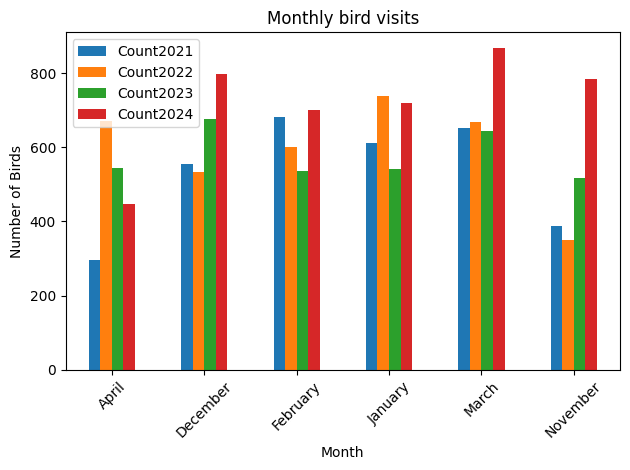

In [92]:
### PLOTS ###
#  matplotlib is plt
feeder_visits.set_index('Month',inplace=True)
ax = feeder_visits.plot(kind='bar')


ax.set_title('Monthly bird visits')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Birds')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()